<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/MasterStats

/content/drive/MyDrive/MasterStats


**Introduction to GLM/ Regression**
<br>
We have our data, which is a bunch of numbers that are measured from the world somehow. Then we have a mathmetical model, which is a set of mathematical equations that we define.
<br>
The idea is we want to match the model with the data, and see how the model matches the data.
<br>
You break down the model even more to additional parts, **Fixed Features and Free Parameters**
<br>
Fixed features are the components of the model that we as the researcher get to define these features.
<br>
This is based of theory and intuition and what you expect from the data.
<br>
Free Parameters are immutable. The things we allow to change numerically dpending on well the model fits the data.
<br>

***ANOVA vs Regression***
* ANOVA is used when all Independent Variables are discrete *usually categorical*
* Regression is used when at least some independent variables are continous
<br>
**The Five Steps to model fitting**
1. Defone the equations underlying the model.
2. Map the data into the model quation
3. Convert the equations into a matrix vector equation
4. Compute the parameters
5. Statistical evaluation of the
* Step 5 has two questions
** Is the model a good fit to the data?
** Are individual Beta coefficients statistically significant

```
h = Beta0 + Beta1 S + Beta2 P + Beta3n
```
h = height
<br>
Beta0 = intercept when all other parameters are 0
<br>
s = sex (male/ female)
<br>
p = parents height
<br>
n = childhood nutrition
<br>
The intercept term is usually not interpreted and usakky not very intresting, **but it needs to be in the model because it captures the offset of the data when all other predictors are set to 0**

***Linear means addition and scalar multiplication***
<br>
GLMs (**ANOVA Regression, Correlation**) are linear models
<br>
*Log, square root, powers, trigonometry, are all nonlinear operations*
<br>
*the data can have nonlinearities; only the parameters must be linear in the model*


**Linear Least Squares**
<br>
*via left inverse*
X Beta = y
<br>
X is the deisgn matrix,
<br>
Beta is the vector of regression coefficients, and what we solve for.
<br>
y is the dependent variable
<br>
and we then want to solve for Beta
<br>
We want to isolate Beta and since x is a matrix we can not divide in linear algebra
<br>
since x which is the design matrix is a tall matrix it does not have an inverse becasue those are for square matrices
<br>
If you assume some conditions on the design matrix we can apply the one sided inverse/ left inverse
<br>
the left inverse multiplication will isolate Beta, its an closed form anallytic solution, it can be proven mathematically.
<br>
**Conditions on X for left inverse to exist**
<br>
1. Tall Matrix, more rows than columns which means it more observations than features
2. Independent Independent Variables, can not be scalar multiples of each other or that they could be combined together
**ties directly to multicollinearity**

**Evaluating Regression Models R2 and F**
```
y = Beta0 + Beta1 x1 + ... + Betak xk + epsilon  
```
```
epsilon = y - (Beta0 + Beta1 x1 + ... + Betak xk)
```
```
yhat = Beta0 + Beta1 x1 + ... + Betak xk
```
```
epsilon = y - yhat
```
```
R2 = 1 - SS epsilon / SS Total == 1 - sum(y - yhat)**2 / sum(y - ymean)**2
```
same sum of square total from ANOVA , very similar to variance just without the scaling by n-1
<br>

for the sum of sqaures epsilon , instead of subtracting off the mean of the data we are substracting the model fit/ model prediction
<br>

R2 close to 1 means the model fits the data well
<br>

R2 close to 0 means the model fits the data poorly
<br>

R2 below 0 is mostly due to an error, in terms of statistical modeling it means the predicted data is predicting worse than the mean
<br>

*There is no cut off for a good R2, R2 is often used in model comparison*
<br>
**Evaluating model statistical signigificance with F**
```
H0: Beta 1-k = 0
```
The H0 allows for a none zero Beta0 , a significant intercept but all of the other coefficients from 1-k
<br>

where k is the number of parameters in the model. The number of regressors the number of independent variables all equal to 0
```
HA: At least one Beta =! 0
```
```
ss epsilon =  sum(y - yhat)**2 , ss model = sum(yhat - ymean)**2
```
```
F(k -1, N-k) = SS Model/ (k - 1) / SS Epsilon / (N - k) k it the total number of parameters including the parameter
```
The F statistic tells us about the entire model, it doesnt say anything about any individual Beta coefficient.
<br>

It doesnt tell us whether the individual regression coefficients are significant
<br>
**Significance of individual Beta Coefficients**
```
tN-k = Betaj / STD Beta
```
STD Beta the square root of the mean square of the residuals  multiplied by the design matrix

**Simple Regression**
<br>
Simple Regression has one dependent variable and one independent *technically two IVs including the intercept*
```
yi = Beta0 + Beta1 xi + epsilon
```
```
epsilon i = yi - (Beta0 + Beta1 xi) 'model predicted area'
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

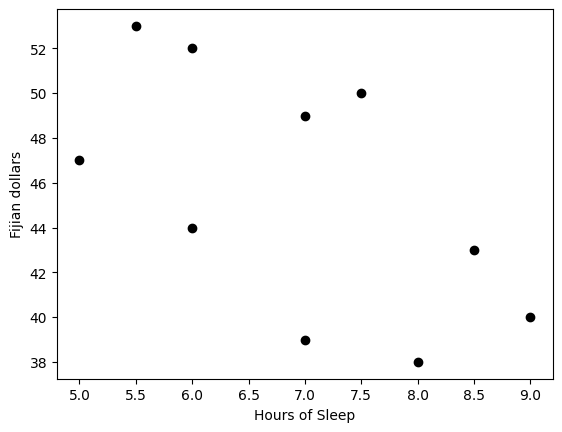

In [3]:
#effects of sleep on food spending
sleepHours = [5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]
dollars = [47, 53, 52, 44, 39, 49, 50, 38, 43, 40]

#show the data
plt.plot(sleepHours, dollars, 'ko', markerfacecolor='k')
plt.xlabel('Hours of Sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [10]:
#manuel regression via least squares fitting

#create the deisgn matrix
desmat = np.vstack((np.ones(10), sleepHours)).T #tall matrix more features than rows

#compute the beta parameters (regression coeifficents)
beta = np.linalg.lstsq(desmat, dollars, rcond=None)[0]
print(beta)

#predicated data values
yhat = desmat@beta

[62.84737679 -2.49602544]


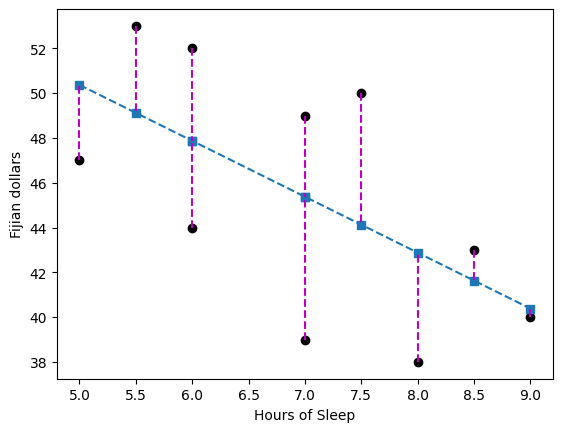

In [12]:
#show previous data
plt.plot(sleepHours, dollars, 'ko', markerfacecolor='k')


#predicted valued
plt.plot(sleepHours, yhat, 's--')

#show the residuals
for i in range(10):
  plt.plot([sleepHours[i], sleepHours[i]], [dollars[i], yhat[i]], 'm--' )

plt.xlabel('Hours of Sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [13]:
#with scipy

slope, intercept, r, p, std_err = stats.linregress(sleepHours, dollars)
print(intercept, slope)
print(beta)

62.84737678855326 -2.4960254372019075
[62.84737679 -2.49602544]
